# 01 Pressinõukogule esitatud kaebused 2002-2021

In [1]:
from estnltk import Text
from matplotlib import pyplot as plt
import pandas as pd
import re

In [340]:
kaebused = pd.read_csv('toofailid/kaebused_2002_2021.csv')

In [341]:
kaebused.shape

(1081, 6)

In [342]:
# Tabeli veerg väiksetäheliseks listiks
def Veerg_listiks(data,veerg):
    veerg_list = data[veerg].to_list()
    veerg_list1 = [rida.lower() for rida in veerg_list]
    return veerg_list1

## 1.1 Kaebuse esitamise kuupäeva ja aasta eraldamine (veerust Kaebaja)

In [343]:
# Tabeli veerust kaebuse esitamise kuupäeva eraldamine.
# Kuupäevast aasta eraldamine.
kaebuse_kuupaevad = []
kaebuse_aastad = []
for kaebaja in Veerg_listiks(kaebused, 'Kaebaja'):
    match = re.search(r'\d{2}\.\d{2}\.\d{2}', kaebaja) #kuupäev formaadis 24.02.22
    if match:
        kaebuse_kuupaev = match[0][0:8]
        aasta = '20' + match[0][6:8] #aasta formaat 2022
    kaebuse_kuupaevad.append(kaebuse_kuupaev)
    kaebuse_aastad.append(aasta)

# Tabelisse vastavate veergude lisamine
kaebused.insert(2,'Kaebuse kuupäev', kaebuse_kuupaevad)
kaebused.insert(3,'Kaebuse aasta', kaebuse_aastad)

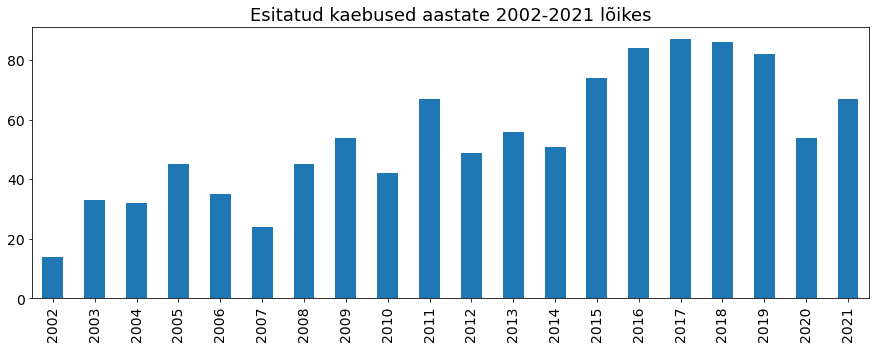

In [344]:
# Esitatud kaebused aastate lõikes, salvestatud failidesse
sagedused1 = kaebused['Kaebuse aasta'].value_counts().sort_index()
tabel1 = pd.DataFrame({'Kaebuse esitamise aasta':sagedused1.index, 'Kaebuste arv aastas':sagedused1.values})
tabel1.to_excel("01tabelid/tabel1_Esitatud_kaebused_aastate_lõikes_2002_2021.xlsx")
fig, ax = plt.subplots(figsize=(15,5))
plt.title("Esitatud kaebused aastate 2002-2021 lõikes", size=18)
sagedused1.plot(ax=ax, kind='bar', fontsize=14)
plt.savefig("01joonised/joonis1_Esitatud_kaebused_aastate_lõikes_2002_2021.png")
plt.show()

In [345]:
tabel1

,Kaebuse esitamise aasta,Kaebuste arv aastas
0,2002,14
1,2003,33
2,2004,32
3,2005,45
4,2006,35
5,2007,24
6,2008,45
7,2009,54
8,2010,42
9,2011,67


## 1.2 Lahendi kuupäeva ja lahendi tulemuse eraldamine (veerust Lahend) 

In [346]:
# Tabeli veerust lahendi kuupäeva ja lahendi tulemuse eraldamine.
lahendi_kuupaevad = []
lahendi_tulemused = []
for lahend in Veerg_listiks(kaebused, 'Lahend'):
    match = re.search(r'\d{2}\.\d{2}\.\d{2,}', lahend) #kuupäev formaadis 24.02.22 või 24.02.2022
    if match:
        lahendi_kuupaev = match[0][0:10]
    lahend_tulemus = re.sub('[0-9.]+', '', lahend).strip(' ') #eristatakse lahend
    lahendi_kuupaevad.append(lahendi_kuupaev) 
    lahendi_tulemused.append(lahend_tulemus)
# Tabelisse vastavate veergude lisamine
kaebused.insert(7,'Lahendi kuupäev', lahendi_kuupaevad)
#kaebused.insert(8,'Lahendi tulemus', lahendi_tulemused)

In [347]:
lahendi_tulemused1 = []
lahendi_tulemused2 = []
for tulemus in lahendi_tulemused:
    if 'pressinõukogu'in tulemus or 'otsus' in tulemus:
        lahendi_tulemused1.append('pressinõukogu otsus')
        lahendi_tulemused2.append('pressinõukogu otsus')
        
    else:
        lahendi_tulemused1.append('muu lahend')
        lahendi_tulemused2.append(tulemus)
kaebused.insert(7,'Lahendi tulemus1', lahendi_tulemused1)
kaebused.insert(8,'Lahendi tulemus2', lahendi_tulemused2)

In [348]:
# Ebavajalike veergude eemaldamine
del kaebused['Kaebaja']
del kaebused['Lahend']

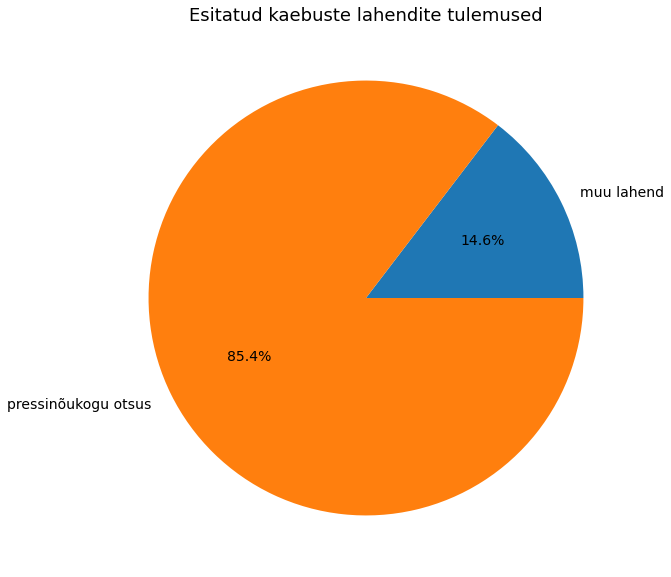

In [349]:
# Lahendid tulemuste lõikes, salvestatud faili
sagedused2 = kaebused['Lahendi tulemus2'].value_counts()
tabel2 = pd.DataFrame({'Lahendi tulemus':sagedused2.index, 'Lahendite arv':sagedused2.values})
tabel2.to_excel("01tabelid/tabel2_Esitatud_kaebuste_lahendite_tulemused.xlsx")
fig, ax = plt.subplots(figsize=(20, 10))
plt.title("Esitatud kaebuste lahendite tulemused", size=18)
kaebused['Lahendi tulemus1'].value_counts().sort_values().plot(ax = ax, kind='pie', fontsize=14, autopct='%1.1f%%')
plt.ylabel("")
plt.savefig("01joonised/joonis2_Esitatud_kaebuste_lahendite_tulemused.png")
plt.show()

In [350]:
tabel2

,Lahendi tulemus,Lahendite arv
0,pressinõukogu otsus,923
1,tagasi lükatud,59
2,tagasi võetud,20
3,kokkulepe,18
4,menetlus lõpetatud,13
5,poolte kokkulepe,13
6,lahendatud,12
7,lahendita,10
8,kokkulepe eelmenetluse käigus,8
9,jäetud läbi vaatamata,2


In [351]:
kaebused.shape

(1081, 9)

## 1.3 Eesti ajakirjanduseetika koodeksi punktide eristamine tekstist

### https://meedialiit.ee/eetikakoodeks/

In [352]:
# Tabeli veerust Otsuse sisu eraldatakse koodeksipunktid
koodeks = [re.findall(r'[1-6]\.[0-9]+', otsus) for otsus in Veerg_listiks(kaebused,'Otsuse sisu')]

# Tabelisse lisatud veerg koodeksipunktidega
kaebused['Koodeks'] = koodeks

# Eesti ajakirjanduseetika koodeksi punktid
koodeksipunktid = ['1.1', '1.2', '1.3', '1.4', '1.5', '1.6', 
                   '2.1', '2.2', '2.3', '2.4', 
                   '3.1','3.2', '3.3', '3.4', '3.5', '3.6','3.7',
                   '4.1', '4.2', '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '4.10', '4.11', '4.12',
                   '5.1', '5.2', '5.3',
                   '6.1', '6.2', '6.3', '6.4']

In [353]:
# Väljastab listi: elemendi leidumise korral 1, muidu 0
def Kodeerija(k, kd_list):
    list_k = []
    for v in kd_list:
        if k in v:
            list_k.append(1)
        else:
            list_k.append(0)
    return list_k

In [354]:
# Tabelisse koodeksipunkti veeru lisamine
koodeks_kasutamata = []
koodeks_kasutatud = []
for punkt in koodeksipunktid:
    k = Kodeerija(punkt, koodeks)
    Sum = sum(k) #kui 0, siis pole seda koodeksipunkti kasutatud
    if Sum == 0:
        koodeks_kasutamata.append(punkt)
    else:
        koodeks_kasutatud.append(punkt)
        kaebused[punkt] = k

In [355]:
# Kasutatud koodeksipunktide arv
len(koodeks_kasutatud)

26

In [356]:
# Koodeksipunktide mainimine ühes kaebuses
kaebused['Koodeksipunkte'] = kaebused[koodeks_kasutatud].sum(axis=1)

In [357]:
# Kõik  kokku
kaebused['Koodeksipunkte'].sum()

535

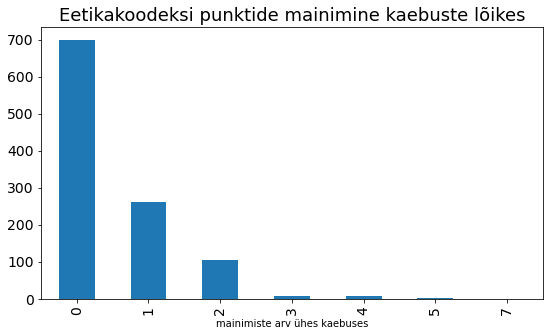

In [358]:
sagedused3= kaebused['Koodeksipunkte'].value_counts().sort_values(ascending=False)
tabel3 = pd.DataFrame({'Koodeksipunkte ühes kaebuses':sagedused3.index, 'Kaebuste arv':sagedused3.values})
tabel3.to_excel("01tabelid/tabel3_Eetikakoodeksi_punktide_mainimine_kaebuste_lõikes.xlsx")
fig, ax = plt.subplots(figsize=(9, 5))
plt.title("Eetikakoodeksi punktide mainimine kaebuste lõikes", size=18)
sagedused3.plot(ax = ax, xlabel = 'mainimiste arv ühes kaebuses', kind='bar', fontsize=14)
plt.savefig("01joonised/joonis3_Eetikakoodeksi_punktide_mainimine_kaebuste_lõikes.png")
plt.show()

In [359]:
tabel3

,Koodeksipunkte ühes kaebuses,Kaebuste arv
0,0,699
1,1,261
2,2,104
3,3,7
4,4,7
5,5,2
6,7,1


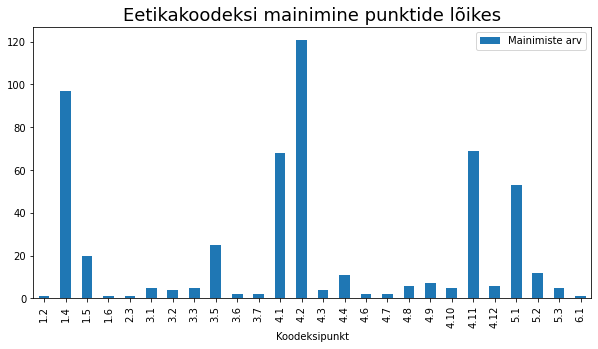

In [360]:
# Koodeksipunktide mainimised
list_kokku = []
tabel4 = pd.DataFrame()
for i in koodeks_kasutatud:
    Total = kaebused[i].sum()
    list_kokku.append(Total)
tabel4['Koodeksipunkt'] = koodeks_kasutatud
tabel4['Mainimiste arv'] = list_kokku
tabel4.to_excel("01tabelid/tabel4_Eetikakoodeksi_mainimine_punktide_lõikes.xlsx") 
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("Eetikakoodeksi mainimine punktide lõikes", size=18)
tabel4.plot(ax=ax, kind = 'bar', x = 'Koodeksipunkt', y = 'Mainimiste arv')
plt.savefig("01joonised/joonis4_Eetikakoodeksi_mainimine_punktide_lõikes.png")
plt.show()

In [361]:
# Mainimisi kokku
tabel4['Mainimiste arv'].sum()

535

In [362]:
tabel4

,Koodeksipunkt,Mainimiste arv
0,1.2,1
1,1.4,97
2,1.5,20
3,1.6,1
4,2.3,1
5,3.1,5
6,3.2,4
7,3.3,5
8,3.5,25
9,3.6,2


In [364]:
kaebused.to_csv('toofailid/kaebused_töödeldud.csv',index=False)
read_file = pd.read_csv (r'toofailid/kaebused_töödeldud.csv')
read_file.to_excel (r'toofailid/kaebused_töödeldud.xlsx', index = None, header=True)

## 1.4 Pressinõukogu otsuse saanud kaebuste eristamine: õigeksmõistev, tauniv

### Järgnevas vaadeldakse pressinõukogult otsuse saanud kaebusi, teised kaebused jäetakse vaatluse alt välja

In [379]:
kaebused_toodeldud = pd.read_csv('toofailid/kaebused_töödeldud.csv')
kaebused_otsusega = kaebused_toodeldud[kaebused_toodeldud['Lahendi tulemus1'] == 'pressinõukogu otsus']

In [380]:
print('Pressinõukogu otsusega kaebusi on: ' + str(len(kaebused_otsusega)))

Pressinõukogu otsusega kaebusi on: 923


In [381]:
tulemus_list = []
for sonad in Veerg_listiks(kaebused_otsusega,'Otsuse sisu'):
    #sonad = sonad.lower()
    if 'õigeksmõistev' in sonad and 'tauniv'  in sonad:
        tulemus_list.append('topeltlahend')        
    elif 'õigeksmõistev' in sonad:
        tulemus_list.append('õigeksmõistev')        
    elif 'tauniv' in sonad:
        tulemus_list.append('tauniv')
    else: 
        tulemus_list.append('muu otsus')

In [382]:
kaebused_otsusega.insert(9,'Lahendi liik', tulemus_list)

In [383]:
kaebused_otsusega

,#,Kaebuse kuupäev,Kaebuse aasta,Väljaanne,Kaebuse sisu,Lahendi tulemus1,Lahendi tulemus2,Lahendi kuupäev,Otsuse sisu,Lahendi liik,...,4.8,4.9,4.10,4.11,4.12,5.1,5.2,5.3,6.1,Koodeksipunkte
0,1081,27.12.21,2021,"Pärnu Postimees 07.12.21 Käre pakane viis bussid rivist välja, autoabi osutajatel käed-jalad tööd täis","Kaebaja leiab, et artikli foto on eksitav, sest jätab mulje nagu poleks ATKO buss sõita saanud.",pressinõukogu otsus,pressinõukogu otsus,27.01.22,"ÕIGEKSMÕISTEV: Pärnu Postimees ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei jäta artikkel muljet, nagu oleks ATKO Bussiliinide bussidel käreda külmaga probleeme olnud. Ka pildiallkiri ütleb, et liinil nr 40 probleeme ei olnud.",õigeksmõistev,...,0,0,0,0,0,0,0,0,0,0
1,1080,08.12.21,2021,Eesti Ekspress 08.12.21 Varro Vooglaid räägib kodusõja puhkemisest,Kaebaja hinnangul jätab artikli juhtlõik temast eksitava ja pahatahtliku mulje.,pressinõukogu otsus,pressinõukogu otsus,27.01.22,"ÕIGEKSMÕISTEV: Ekspress ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei ole loo juhtlõik eksitav, sest artiklis ütleb Varro Vooglaid, et on valmis oma pere kaitsmiseks sundvaktsineerimise eest relva haarama. Pressinõukogu arvates on ajakirjandusel õigus pealkirjades ja juhtlõikudes artiklid värvikamalt kokku võtta, kuid seda ei tohi teha kellegi arvelt. Antud juhul ei ole juhtlõiku värve lisades kaebajat kuritarvitatud, sest Varro Vooglaid ise toob loos vaktsineerimise temaatika sisse.",õigeksmõistev,...,0,0,0,0,0,0,0,0,0,0
2,1079,08.12.21,2021,Hiiu Leht 03.12.21 Maksumaksjale läks Valge Ingli afäär maksma 51 000 eurot 03.12.21 Roostes Valge Ingel,"Kaebaja leiab, et artiklis ja juhtkirjas on tema kohta esitatud tõsist kriitikat, kuid sõna ei antud. Kaebaja hinnangul sisaldab artikkel eksitavat ja ebatäpset infot.",pressinõukogu otsus,pressinõukogu otsus,27.01.22,"TAUNIV: Hiiu Leht rikkus ajakirjanduseetika koodeksi punkti 5.1., mis näeb ette, et kui kellegi kohta avaldatakse tõsiseid süüdistusi, tuleks talle pakkuda kommentaari võimalust samas numbris. Pressinõukogu hinnangul süüdistatakse artiklis Inge Taltsi tuuliku naabrite hirmutamises ja eksitava info jagamises. Samuti rikkus leht ajakirjanduseetika koodeksi punkti 3.3., mis näeb ette, et ajakirjanik peab rangelt kinni informatsiooniallikale antud lubadustest ja väldib lubadusi, mida ta ei suuda täita. Pressinõukogu hinnangul ei pidanud ajakirjanik kinni Inge Taltsile antud lubadusest avaldada tema seisukoht järgmises artiklis.",tauniv,...,0,0,0,0,0,1,0,0,0,2
3,1078,06.12.21,2021,Hiiu Leht 22.10.21 Jalutuskäik Tiit Leito elutöö varemetel,"Kaebaja ei ole rahul, et tema vastulauset ei avaldatud, kuigi artiklis esitati tema kohta süüdistusi.",pressinõukogu otsus,pressinõukogu otsus,27.01.22,"ÕIGEKSMÕISTEV: Hiiu Leht ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul on artikkel üldisemalt maastikukaitsealast, Saarnaki hoonete kompleksi mainitakse vaid väikeses osas loost ning seejuures ei avaldatud rentniku nime. Pressinõukogu hinnangul ei esitata kaebaja kohta tõsiseid süüdistusi ja seepärast ei olnud vajadust kaebajale sõna anda.",õigeksmõistev,...,0,0,0,0,0,0,0,0,0,0
4,1077,02.12.21,2021,Õhtuleht 01.12.21,"Kaebaja leiab, et artikkel on pahatahtlik ja sisaldab valeinfot. Samuti ei ole kaebaja rahul, et teda on artiklis nimeliselt nimetatud.",pressinõukogu otsus,pressinõukogu otsus,27.01.2022,ÕIGEKSMÕISTEV: Õhtuleht ei rikkunud head ajakirjandustava. Pressinõukogu hinnangul kajastab artikkel kohtuotsust ja välja on jäetud eraelulised andmed.,õigeksmõistev,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,6,04.12.02,2002,"Virumaa Teataja 23.10.02 ""Selja hakkab uut sängi otsima""","Kaebaja väitel levitab ajaleht kaebaja Karepal asuvast majast kirjutades juba pikemat aega väärinfot, mis on tekitanud moraalset kahju kaebaja perekonnale. Kaebaja pole rahul ka tema vastuväidete avaldamata jätmisega.",pressinõukogu

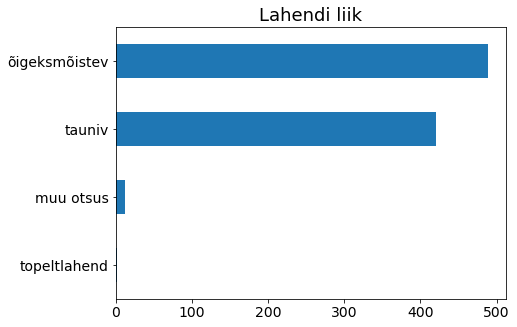

In [386]:
# Lahendid tulemuste lõikes, salvestatud faili
sagedused5 = kaebused_otsusega['Lahendi liik'].value_counts()
tabel5 = pd.DataFrame({'Lahendi liik':sagedused5.index, 'Lahendite arv':sagedused5.values})
tabel5.to_excel("01tabelid/tabel5_Lahendi_liik.xlsx")
fig, ax = plt.subplots(figsize=(7, 5))
plt.title("Lahendi liik", size=18)
sagedused5.sort_values().plot(ax = ax, kind='barh', fontsize=14)
plt.savefig("01joonised/joonis5_Lahendi_liik.png")
plt.show()

In [387]:
tabel5

,Lahendi liik,Lahendite arv
0,õigeksmõistev,488
1,tauniv,420
2,muu otsus,13
3,topeltlahend,2


## Andmestik Kaebused1 - õigeksmõistvad ja taunivad otsused

In [457]:
data = kaebused_otsusega[(kaebused_otsusega['Lahendi liik']=='õigeksmõistev') |(kaebused_otsusega['Lahendi liik']=='tauniv')]

In [458]:
# Ebavajalike tunnuste eemaldamine
del data['Lahendi tulemus1']
del data['Lahendi tulemus2']

In [459]:
data.shape

(908, 36)

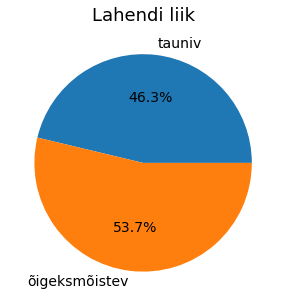

In [460]:
sagedused6 = data['Lahendi liik'].value_counts()
tabel6 = pd.DataFrame({'Lahendi liik':sagedused6.index, 'Lahendite arv':sagedused6.values})
tabel6.to_excel("01tabelid/tabel6_Lahendi_liik_oigeks_tauniv.xlsx")
fig, ax = plt.subplots(figsize=(7, 5))
plt.title("Lahendi liik", size=18)
sagedused6.sort_values().plot(ax = ax, kind='pie', fontsize=14, autopct='%1.1f%%')
plt.ylabel("")
plt.savefig("01joonised/joonis6_Lahendi_liik_oigeks_tauniv.png")
plt.show()

In [461]:
tabel6

,Lahendi liik,Lahendite arv
0,õigeksmõistev,488
1,tauniv,420


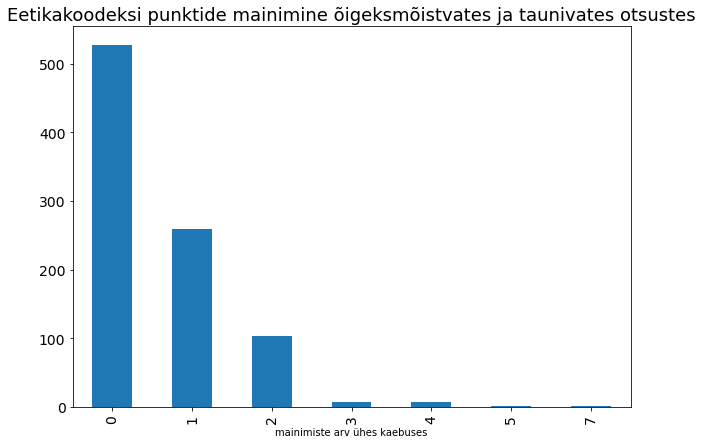

In [462]:
sagedused7 = data['Koodeksipunkte'].value_counts().sort_values(ascending=False)
tabel7 = pd.DataFrame({'Koodeksipunkte ühes kaebuses':sagedused7.index, 'Kaebuste arv':sagedused7.values})
tabel7.to_excel("01tabelid/tabel7_Eetikakoodeksi_punktide_mainimine_kaebuste_lõikes_oigeks_tauniv.xlsx")
fig, ax = plt.subplots(figsize=(10, 7))
plt.title("Eetikakoodeksi punktide mainimine õigeksmõistvates ja taunivates otsustes", size=18)
#autopct='%1.1f%%'
sagedused7.plot(ax = ax, xlabel = 'mainimiste arv ühes kaebuses', kind='bar', fontsize=14)
plt.savefig("01joonised/joonis7_Eetikakoodeksi_punktide_mainimine_kaebuste_lõikes_oigeks_tauniv.png")
plt.show()

In [463]:
tabel7

,Koodeksipunkte ühes kaebuses,Kaebuste arv
0,0,528
1,1,259
2,2,104
3,3,7
4,4,7
5,5,2
6,7,1


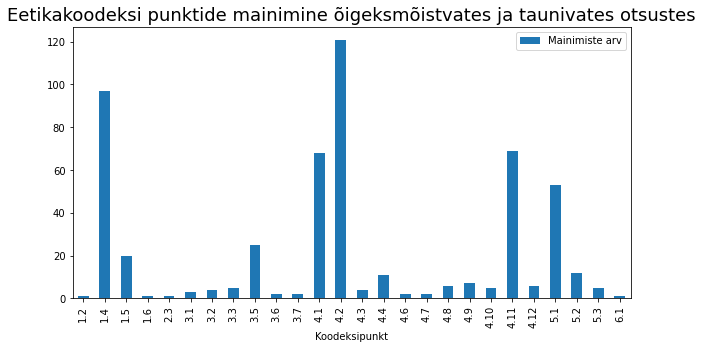

In [464]:
# Koodeksipunktide mainimised
list_kokku = []
tabel8 = pd.DataFrame()
for i in koodeks_kasutatud:
    Total = data[i].sum()
    list_kokku.append(Total)
tabel8['Koodeksipunkt'] = koodeks_kasutatud
tabel8['Mainimiste arv'] = list_kokku
tabel8['Osakaal, %'] = round((tabel8['Mainimiste arv'] / 
                      tabel8['Mainimiste arv'].sum() )* 100, 1)
tabel8.to_excel("01tabelid/tabel8_Eetikakoodeksi_mainimine_punktide_lõikes_oigeks_tauniv.xlsx") 
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("Eetikakoodeksi punktide mainimine õigeksmõistvates ja taunivates otsustes", size=18)
tabel8.plot(ax=ax, kind = 'bar', x = 'Koodeksipunkt', y = 'Mainimiste arv')
plt.savefig("01joonised/joonis8_Eetikakoodeksi_mainimine_punktide_lõikes_oigeks_tauniv.png")
plt.show()

In [465]:
#Otsuse saanud kaebustes mainitud koodeksipunktid kokku
tabel8['Mainimiste arv'].sum()

533

In [466]:
tabel8

,Koodeksipunkt,Mainimiste arv,"Osakaal, %"
0,1.2,1,0.2
1,1.4,97,18.2
2,1.5,20,3.8
3,1.6,1,0.2
4,2.3,1,0.2
5,3.1,3,0.6
6,3.2,4,0.8
7,3.3,5,0.9
8,3.5,25,4.7
9,3.6,2,0.4


## Kas seda osa saaks teha kogu andmestukuga? 1.5 Väljaande nime filtreerimine õigeksmõistvates ja taunivates otsustes

In [561]:
tr = 'trükimeedia'
te = 'rääkiv meedia'

In [562]:
def Valjaanne (k):

    if 'Delfi' in k:
        t = ('Delfi', tr)
    elif 'Pärnu Postimees' in k:
        t = ('Pärnu Postimees', tr)
    elif 'Postimees' in k or 'Postimehe' in k:
        t = ('Postimees', tr)
    elif 'Lõuna-Eesti Postimees' in k:
        t = ('Lõuna-Eesti Postimees', tr)
    elif 'Lääne-Harju Ekspress' in k:
        t = ('Lääne-Harju Ekspress', tr)
    elif 'Eesti Ekspress' in k or ('Eesti' in k and 'Ekspress' in k):
        t = ('Eesti Ekspress', tr)  
    elif 'Eesti Päevaleht' in k or 'Eesti Päevalehe'in k or 'Eesti Päevalehe LP' in k or 'LP' in k or ('Eesti' in k and 'Päevaleht' in k):
        t = ('Eesti Päevaleht', tr)  
    elif 'Õhtuleht' in k:
        t = ('Õhtuleht', tr)
    elif 'Maaleht' in k:
        t = ('Maaleht', tr)
    elif 'Õpetajate Leht' in k or ('Õpetajate' in k and 'Leht' in k):
        t = ('Õpetajate Leht', tr)
    elif 'Äripäev' in k:
        t = ('Äripäev', tr)
    elif 'Hiiu Leht' in k  or ('Hiiu' in k and 'Leht' in k):
        t = ('Hiiu Leht', tr)
    elif 'Oma Saar' in k  or ('Oma' in k and 'Saar' in k):
        t = ('Oma Saar', tr)
    elif 'Elva Postipoiss' in k  or ('Elva' in k and 'Postipoiss' in k):
        t = ('Elva Postipoiss', tr)
    elif 'Põhjarannik' in k:
        t = ('Põhjarannik', tr)
    elif 'Vooremaa' in k:
        t = ('Vooremaa', tr)
    elif 'Sakala' in k:
        t = ('Sakala', tr)
    elif 'Pirita' in k:
        t = ('Pirita', tr)
    elif 'Valgamaalane' in k:
        t = ('Valgamaalane', tr)
    elif 'Koit' in k:
        t = ('Koit', tr)
    elif 'Kroonika' in k:
        t = ('Kroonika', tr)
    elif 'Lõuna Leht' in k or 'LõunaLeht' in k:
        t = ('LõunaLeht', tr)
    elif 'Pealinn' in k:
        t = ('Pealinn', tr)
    elif 'Sirp' in k:
        t = ('Sirp', tr)
    elif 'Müürileht' in k:
        t = ('Müürileht', tr)
    elif 'BNS' in k:
        t = ('BNS', tr)
    elif 'Eesti Kirik' in k  or ('Eesti' in k and 'Kirik' in k):
        t = ('Eesti Kirik', tr)
    elif 'Gorod' in k:
        t = ('Gorod', tr)
    elif 'Stolitsa' in k:
        t = ('Stolitsa', tr)
    elif 'Den za Dnjom' in k:
        t = ('Den za Dnjom', tr)
    elif 'MK-Estonia' in k:
        t = ('MK-Estonia', tr)
    elif 'Sõnumitooja' in k:
        t = ('Sõnumitooja', tr)
    elif 'Molodjoz Estonii' in k or ('Molodjoz' in k and 'Estonii' in k):
        t = ('Molodjoz Estonii', tr)
    elif 'Vesti Nedeli' in k or ('Vesti' in k and 'Nedeli' in k):
        t = ('Vesti Nedeli', tr)
    elif 'Sillamäeskii Vestnik' in k or ('Sillamäeskii' in k and 'Vestnik' in k):
        t = ('Sillamäeskii Vestnik', tr)
    elif 'Vesti Dnja' in k or ('Vesti' in k and 'Dnja' in k):
        t = ('Vesti Dnja', tr)
    elif 'Narvskaja Gazeta' in k or ('Narvskaja' in k and 'Gazeta' in k):
        t = ('Narvskaja Gazeta', tr)
    elif 'Delovõje Vedomosti' in k or ('Delovõje' in k and 'Vedomosti' in k):
        t = ('Delovõje Vedomosti', tr)
    elif 'Estonija' in k:
        t = ('Estonija', tr)
    elif 'Pere&Kodu' in k:
        t = ('Pere&Kodu', tr)
    elif 'Harju Elu' in k or ('Harju' in k and 'Elu' in k):
        t = ('Harju Elu', tr)  
    elif 'Lääne Elu' in k or ('Lääne' in k and 'Elu' in k):
        t = ('Lääne Elu', tr) 
    elif 'Meie Maa' in k or ('Meie' in k and 'Maa' in k):
        t = ('Meie Maa', tr) 
    elif 'Saarte Hääl' in k or ('Saarte' in k and 'Hääl' in k):
        t = ('Saarte Hääl', tr) 
    elif 'Raplamaa Sõnumid' in k or ('Raplamaa' in k and 'Sõnumid' in k):
        t = ('Meie Maa', tr) 
    elif 'Järva Teataja' in k or ('Järva' in k and 'Teataja' in k):
        t = ('Järva Teataja', tr) 
    elif 'Virumaa Teataja' in k or ('Virumaa' in k and 'Teataja' in k):
        t = ('Virumaa Teataja', tr) 
    elif 'Võrumaa Teataja' in k or ('Võrumaa' in k and 'Teataja' in k):
        t = ('Võrumaa Teataja', tr) 
    elif 'TV3' in k or ('TV' in k and '3' in k):
        t = ('TV3', te)
    elif 'Kanal2' in k or 'Kanal 2' in k or 'Kuuuurija' in k or ('Kanal' in k and '2' in k):
        t = ('Kanal2', te)
    elif 'ETV' in k or 'ERR' in k or 'ERRi' in k or 'Rahvusringhääling' in k or 'Eesti Televisioon' in k or ('Eesti' in k and 'Rahvusringhääling' in k):
        t = ('ERR', te)
    elif 'Kuku' in k or ('Kuku' in k and 'Raadio' in k):
        t = ('Kuku Raadio', te)
    elif 'Tallinna Televisioon' in k or 'Tallinna TV' in k:
        t = ('Tallinna TV', te)
    elif 'Elu24' in k:
        t = ('Elu24', tr)
    else:
        t = ('muu väljaanne', 'muu meedia')
    return t

##### Väljaande nime (kanali) ja väljaande tüübi määramine esimesel viisil (käsitsi määratud väljaannete nimede abil)

In [563]:
valjaanne = data['Väljaanne'].to_list()
valjaande_tyyp = [Valjaanne(k) for k in valjaanne]

In [564]:
Vkanal1, Vtyyp1 = map(list, zip(*valjaande_tyyp))
data['Vkanal1'] = Vkanal1
data['Vtyyp1'] = Vtyyp1

C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [565]:
data.shape

(908, 42)

In [566]:
data

,#,Kaebuse kuupäev,Kaebuse aasta,Väljaanne,Kaebuse sisu,Lahendi kuupäev,Otsuse sisu,Lahendi liik,Koodeks,1.2,...,5.2,5.3,6.1,Koodeksipunkte,Väljaande nimi,Väljaande liik,Väljaande tüüp,Meedia liik,Vkanal1,Vtyyp1
0,1081,27.12.21,2021,"Pärnu Postimees 07.12.21 Käre pakane viis bussid rivist välja, autoabi osutajatel käed-jalad tööd täis","Kaebaja leiab, et artikli foto on eksitav, sest jätab mulje nagu poleks ATKO buss sõita saanud.",27.01.22,"ÕIGEKSMÕISTEV: Pärnu Postimees ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei jäta artikkel muljet, nagu oleks ATKO Bussiliinide bussidel käreda külmaga probleeme olnud. Ka pildiallkiri ütleb, et liinil nr 40 probleeme ei olnud.",õigeksmõistev,[],0,...,0,0,0,0,Pärnu Postimees,trükimeedia,Artikkel,trükimeedia,Pärnu Postimees,trükimeedia
1,1080,08.12.21,2021,Eesti Ekspress 08.12.21 Varro Vooglaid räägib kodusõja puhkemisest,Kaebaja hinnangul jätab artikli juhtlõik temast eksitava ja pahatahtliku mulje.,27.01.22,"ÕIGEKSMÕISTEV: Ekspress ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei ole loo juhtlõik eksitav, sest artiklis ütleb Varro Vooglaid, et on valmis oma pere kaitsmiseks sundvaktsineerimise eest relva haarama. Pressinõukogu arvates on ajakirjandusel õigus pealkirjades ja juhtlõikudes artiklid värvikamalt kokku võtta, kuid seda ei tohi teha kellegi arvelt. Antud juhul ei ole juhtlõiku värve lisades kaebajat kuritarvitatud, sest Varro Vooglaid ise toob loos vaktsineerimise temaatika sisse.",õigeksmõistev,[],0,...,0,0,0,0,Eesti Ekspress,trükimeedia,Muu tüüp,trükimeedia,Eesti Ekspress,trükimeedia
2,1079,08.12.21,2021,Hiiu Leht 03.12.21 Maksumaksjale läks Valge Ingli afäär maksma 51 000 eurot 03.12.21 Roostes Valge Ingel,"Kaebaja leiab, et artiklis ja juhtkirjas on tema kohta esitatud tõsist kriitikat, kuid sõna ei antud. Kaebaja hinnangul sisaldab artikkel eksitavat ja ebatäpset infot.",27.01.22,"TAUNIV: Hiiu Leht rikkus ajakirjanduseetika koodeksi punkti 5.1., mis näeb ette, et kui kellegi kohta avaldatakse tõsiseid süüdistusi, tuleks talle pakkuda kommentaari võimalust samas numbris. Pressinõukogu hinnangul süüdistatakse artiklis Inge Taltsi tuuliku naabrite hirmutamises ja eksitava info jagamises. Samuti rikkus leht ajakirjanduseetika koodeksi punkti 3.3., mis näeb ette, et ajakirjanik peab rangelt kinni informatsiooniallikale antud lubadustest ja väldib lubadusi, mida ta ei suuda täita. Pressinõukogu hinnangul ei pidanud ajakirjanik kinni Inge Taltsile antud lubadusest avaldada tema seisukoht järgmises artiklis.",tauniv,"['5.1', '3.3']",0,...,0,0,0,2,Hiiu Leht,trükimeedia,Artikkel,trükimeedia,Hiiu Leht,trükimeedia
3,1078,06.12.21,2021,Hiiu Leht 22.10.21 Jalutuskäik Tiit Leito elutöö varemetel,"Kaebaja ei ole rahul, et tema vastulauset ei avaldatud, kuigi artiklis esitati tema kohta süüdistusi.",27.01.22,"ÕIGEKSMÕISTEV: Hiiu Leht ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul on artikkel üldisemalt maastikukaitsealast, Saarnaki hoonete kompleksi mainitakse vaid väikeses osas loost ning seejuures ei avaldatud rentniku nime. Pressinõukogu hinnangul ei esitata kaebaja kohta tõsiseid süüdistusi ja seepärast ei olnud vajadust kaebajale sõna anda.",õigeksmõistev,[],0,...,0,0,0,0,Hiiu Leht,trükimeedia,Artikkel,trükimeedia,Hiiu Leht,trükimeedia
4,1077,02.12.21,2021,Õhtuleht 01.12.21,"Kaebaja leiab, et artikkel on pahatahtlik ja sisaldab valeinfot. Samuti ei ole kaebaja rahul, et teda on artiklis nimeliselt nimetatud.",27.01.2022,ÕIGEKSMÕISTEV: Õhtuleht ei rikkunud head ajakirjandustava. Pressinõukogu hinnangul kajastab artikkel kohtuotsust ja välja on jäetud eraelulised andmed.,õigeksmõistev,[],0,...,0,0,0,0,Õhtuleht,trükimeedia,Artikkel,trükimeedia,Õhtuleht,trükimeedia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,7,04.12.02,2002,"Estonija 11.11.02 ""Keemia ja elu""","Kaebaja väitel on artikkel täis faktivigu ning kahjustab otsitud negatiivsete järeldustega seetõttu ettevõtt

#### Väljaande nime (kanali) ja väljaande tüübi määramine teisel viisil (nimeüksuste abil)

In [567]:
# Loome uue nimeüksuste tuvastaja 
from estnltk.taggers import NerTagger
ner_tagger = NerTagger()
# Milliseid kihte ner_tagger vajab?
ner_tagger.input_layers

('morph_analysis',)

In [568]:
# Otsitakse tekstist nimesid
nimed = []
from estnltk import Text

for k in valjaanne:
    t= Text(k).tag_layer('morph_analysis')

    # lisame nimeüksuste märgenduse
    ner_tagger.tag(t)
    # leia nimeüksuste liigid
    #entity_labels = t.ner[['nertag']]
    # leia nimeüksuste tekstijupid
    entity_texts = [ne.enclosing_text for ne in t.ner]
    # leia nimeüksuste asukohad
    #entity_spans = [(ne.start, ne.end) for ne in t.ner]

    # väljastab tuvastatud nimeüksused koos nende asukohtade, tekstijuppide ja liikidega:
    #for ne_phrase, ne_label, ne_span in zip(entity_texts, entity_labels, entity_spans):
        #print( ne_span, ne_phrase, ne_label )
    nimed.append(entity_texts)

In [569]:
valjaande_nimi = [Valjaanne(k) for k in nimed]

In [570]:
Vkanal2, Vtyyp2 = map(list, zip(*valjaande_nimi))
data['Vkanal2'] = Vkanal2
data['Vtyyp2'] = Vtyyp2

C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [571]:
Vkanal = list(zip(Vkanal1, Vkanal2))
Vtyyp = list(zip(Vtyyp1, Vtyyp2))

In [572]:
Vnimi = []
for v in Vkanal:
    if v[1] != 'muu väljaanne':
        Vnimi.append(v[1])
    else:
        Vnimi.append(v[0])
Vliik = []
for v in Vtyyp:
    if v[1] != 'muu meedia':
        Vliik.append(v[1])
    else:
        Vliik.append(v[0])

In [573]:
data['Väljaande nimi'] = Vnimi
data['Väljaande liik'] = Vliik

C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [574]:
import pandas as pd
tabel9 = pd.crosstab(index=data["Väljaande nimi"], 
                            columns=data["Väljaande liik"],
                             margins=True).drop(index=('All'))
tabel9['Osakaal, %'] = round((tabel9['All'] / 
                      tabel9['All'].sum() )* 100, 1)

tabel9[['All','Osakaal, %']].to_excel("01tabelid/tabel9_Väljaande_nimi_oigeks_tauniv.xlsx") 
#fig, ax = plt.subplots(figsize=(10, 5))
#plt.title("Väljaanded õigeksmõistvates ja taunivates otsustes", size=18)
#tabel9.plot(ax=ax, kind = 'bar', x = 'Väljaande nimi', y = 'Väljaande liik')
#plt.savefig("01joonised/joonis9_Väljaande_nimi_väljaande_liik_oigeks_tauniv.png")
#plt.show()

In [575]:
del data['Vkanal1']
del data['Vtyyp1']
del data['Vkanal2']
del data['Vtyyp2']

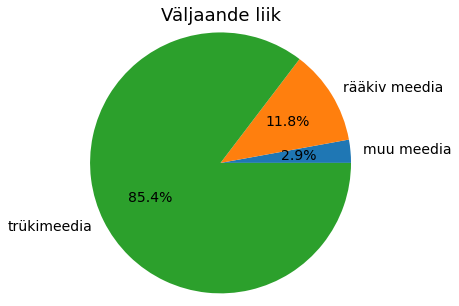

In [576]:
sagedused9_1 = data['Väljaande liik'].value_counts()
tabel9_1 = pd.DataFrame({'Väljaande liik':sagedused9_1.index, 'Väljaannete arv':sagedused9_1.values})
tabel9_1.to_excel("01tabelid/tabel9_1_Väljaande_liik_oigeks_tauniv.xlsx")
fig, ax = plt.subplots(figsize=(7, 5))
plt.title("Väljaande liik", size=18)
sagedused9_1.sort_values().plot(ax = ax, kind='pie', fontsize=14, autopct='%1.1f%%', radius = 1.2)
plt.ylabel("")
plt.savefig("01joonised/joonis9_1_Väljaande_liik_oigeks_tauniv.png")
plt.show()

In [577]:
data.shape

(908, 40)

In [578]:
data

,#,Kaebuse kuupäev,Kaebuse aasta,Väljaanne,Kaebuse sisu,Lahendi kuupäev,Otsuse sisu,Lahendi liik,Koodeks,1.2,...,4.12,5.1,5.2,5.3,6.1,Koodeksipunkte,Väljaande nimi,Väljaande liik,Väljaande tüüp,Meedia liik
0,1081,27.12.21,2021,"Pärnu Postimees 07.12.21 Käre pakane viis bussid rivist välja, autoabi osutajatel käed-jalad tööd täis","Kaebaja leiab, et artikli foto on eksitav, sest jätab mulje nagu poleks ATKO buss sõita saanud.",27.01.22,"ÕIGEKSMÕISTEV: Pärnu Postimees ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei jäta artikkel muljet, nagu oleks ATKO Bussiliinide bussidel käreda külmaga probleeme olnud. Ka pildiallkiri ütleb, et liinil nr 40 probleeme ei olnud.",õigeksmõistev,[],0,...,0,0,0,0,0,0,Pärnu Postimees,trükimeedia,Artikkel,trükimeedia
1,1080,08.12.21,2021,Eesti Ekspress 08.12.21 Varro Vooglaid räägib kodusõja puhkemisest,Kaebaja hinnangul jätab artikli juhtlõik temast eksitava ja pahatahtliku mulje.,27.01.22,"ÕIGEKSMÕISTEV: Ekspress ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei ole loo juhtlõik eksitav, sest artiklis ütleb Varro Vooglaid, et on valmis oma pere kaitsmiseks sundvaktsineerimise eest relva haarama. Pressinõukogu arvates on ajakirjandusel õigus pealkirjades ja juhtlõikudes artiklid värvikamalt kokku võtta, kuid seda ei tohi teha kellegi arvelt. Antud juhul ei ole juhtlõiku värve lisades kaebajat kuritarvitatud, sest Varro Vooglaid ise toob loos vaktsineerimise temaatika sisse.",õigeksmõistev,[],0,...,0,0,0,0,0,0,Eesti Ekspress,trükimeedia,Muu tüüp,trükimeedia
2,1079,08.12.21,2021,Hiiu Leht 03.12.21 Maksumaksjale läks Valge Ingli afäär maksma 51 000 eurot 03.12.21 Roostes Valge Ingel,"Kaebaja leiab, et artiklis ja juhtkirjas on tema kohta esitatud tõsist kriitikat, kuid sõna ei antud. Kaebaja hinnangul sisaldab artikkel eksitavat ja ebatäpset infot.",27.01.22,"TAUNIV: Hiiu Leht rikkus ajakirjanduseetika koodeksi punkti 5.1., mis näeb ette, et kui kellegi kohta avaldatakse tõsiseid süüdistusi, tuleks talle pakkuda kommentaari võimalust samas numbris. Pressinõukogu hinnangul süüdistatakse artiklis Inge Taltsi tuuliku naabrite hirmutamises ja eksitava info jagamises. Samuti rikkus leht ajakirjanduseetika koodeksi punkti 3.3., mis näeb ette, et ajakirjanik peab rangelt kinni informatsiooniallikale antud lubadustest ja väldib lubadusi, mida ta ei suuda täita. Pressinõukogu hinnangul ei pidanud ajakirjanik kinni Inge Taltsile antud lubadusest avaldada tema seisukoht järgmises artiklis.",tauniv,"['5.1', '3.3']",0,...,0,1,0,0,0,2,Hiiu Leht,trükimeedia,Artikkel,trükimeedia
3,1078,06.12.21,2021,Hiiu Leht 22.10.21 Jalutuskäik Tiit Leito elutöö varemetel,"Kaebaja ei ole rahul, et tema vastulauset ei avaldatud, kuigi artiklis esitati tema kohta süüdistusi.",27.01.22,"ÕIGEKSMÕISTEV: Hiiu Leht ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul on artikkel üldisemalt maastikukaitsealast, Saarnaki hoonete kompleksi mainitakse vaid väikeses osas loost ning seejuures ei avaldatud rentniku nime. Pressinõukogu hinnangul ei esitata kaebaja kohta tõsiseid süüdistusi ja seepärast ei olnud vajadust kaebajale sõna anda.",õigeksmõistev,[],0,...,0,0,0,0,0,0,Hiiu Leht,trükimeedia,Artikkel,trükimeedia
4,1077,02.12.21,2021,Õhtuleht 01.12.21,"Kaebaja leiab, et artikkel on pahatahtlik ja sisaldab valeinfot. Samuti ei ole kaebaja rahul, et teda on artiklis nimeliselt nimetatud.",27.01.2022,ÕIGEKSMÕISTEV: Õhtuleht ei rikkunud head ajakirjandustava. Pressinõukogu hinnangul kajastab artikkel kohtuotsust ja välja on jäetud eraelulised andmed.,õigeksmõistev,[],0,...,0,0,0,0,0,0,Õhtuleht,trükimeedia,Artikkel,trükimeedia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,7,04.12.02,2002,"Estonija 11.11.02 ""Keemia ja elu""","Kaebaja väitel on artikkel täis faktivigu ning kahjustab otsitud negatiivsete järeldustega seetõttu ettevõtte mainet. Kaebaja pole rahul asjaoluga, et leht pole valefaktide vältimiseks pöördunud Nitroferdi juhtkonn

##  See osa on kahtlane!!! 1.6 Kaebuse ja otsuse sisu järgi artiklite filtreerimine

In [528]:
art = 'Artikkel'
sa = 'Saatelõik'
vi = 'Video'
re = 'Reklaam'
mu = 'Muu tüüp'

In [529]:
# Teatud sõnade järgi väljaande tüübi määramine
def Tyyp(sonad):
    
    if 'artikkel' in sonad or 'ajaleht' in sonad or 'leht' in sonad or 'kirjutis' in sonad:
        t = art
    elif 'saade' in sonad or 'saatelõik' in sonad or 'uudistesaade' in sonad:
        t = sa
    elif 'video' in sonad:
        t = vi
    elif 'reklaam' in sonad:
        t = re
    else: 
        t = mu
    return t  

In [530]:
kaebuse_sisu= data['Kaebuse sisu'].to_list()
otsuste_sisu= data['Otsuse sisu'].to_list()
artikkel_list1=[Tyyp(k) for k in kaebuse_sisu]
artikkel_list2=[Tyyp(k) for k in otsuste_sisu]
data['Väljaande tüüp1']=artikkel_list1
data['Väljaande tüüp2']=artikkel_list2

C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [531]:
data.head()

,#,Kaebuse kuupäev,Kaebuse aasta,Väljaanne,Kaebuse sisu,Lahendi kuupäev,Otsuse sisu,Lahendi liik,Koodeks,1.2,...,4.12,5.1,5.2,5.3,6.1,Koodeksipunkte,Väljaande nimi,Väljaande liik,Väljaande tüüp1,Väljaande tüüp2
0,1081,27.12.21,2021,"Pärnu Postimees 07.12.21 Käre pakane viis bussid rivist välja, autoabi osutajatel käed-jalad tööd täis","Kaebaja leiab, et artikli foto on eksitav, sest jätab mulje nagu poleks ATKO buss sõita saanud.",27.01.22,"ÕIGEKSMÕISTEV: Pärnu Postimees ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei jäta artikkel muljet, nagu oleks ATKO Bussiliinide bussidel käreda külmaga probleeme olnud. Ka pildiallkiri ütleb, et liinil nr 40 probleeme ei olnud.",õigeksmõistev,[],0,...,0,0,0,0,0,0,Pärnu Postimees,trükimeedia,Muu tüüp,Artikkel
1,1080,08.12.21,2021,Eesti Ekspress 08.12.21 Varro Vooglaid räägib kodusõja puhkemisest,Kaebaja hinnangul jätab artikli juhtlõik temast eksitava ja pahatahtliku mulje.,27.01.22,"ÕIGEKSMÕISTEV: Ekspress ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei ole loo juhtlõik eksitav, sest artiklis ütleb Varro Vooglaid, et on valmis oma pere kaitsmiseks sundvaktsineerimise eest relva haarama. Pressinõukogu arvates on ajakirjandusel õigus pealkirjades ja juhtlõikudes artiklid värvikamalt kokku võtta, kuid seda ei tohi teha kellegi arvelt. Antud juhul ei ole juhtlõiku värve lisades kaebajat kuritarvitatud, sest Varro Vooglaid ise toob loos vaktsineerimise temaatika sisse.",õigeksmõistev,[],0,...,0,0,0,0,0,0,Eesti Ekspress,trükimeedia,Muu tüüp,Muu tüüp
2,1079,08.12.21,2021,Hiiu Leht 03.12.21 Maksumaksjale läks Valge Ingli afäär maksma 51 000 eurot 03.12.21 Roostes Valge Ingel,"Kaebaja leiab, et artiklis ja juhtkirjas on tema kohta esitatud tõsist kriitikat, kuid sõna ei antud. Kaebaja hinnangul sisaldab artikkel eksitavat ja ebatäpset infot.",27.01.22,"TAUNIV: Hiiu Leht rikkus ajakirjanduseetika koodeksi punkti 5.1., mis näeb ette, et kui kellegi kohta avaldatakse tõsiseid süüdistusi, tuleks talle pakkuda kommentaari võimalust samas numbris. Pressinõukogu hinnangul süüdistatakse artiklis Inge Taltsi tuuliku naabrite hirmutamises ja eksitava info jagamises. Samuti rikkus leht ajakirjanduseetika koodeksi punkti 3.3., mis näeb ette, et ajakirjanik peab rangelt kinni informatsiooniallikale antud lubadustest ja väldib lubadusi, mida ta ei suuda täita. Pressinõukogu hinnangul ei pidanud ajakirjanik kinni Inge Taltsile antud lubadusest avaldada tema seisukoht järgmises artiklis.",tauniv,"['5.1', '3.3']",0,...,0,1,0,0,0,2,Hiiu Leht,trükimeedia,Artikkel,Artikkel
3,1078,06.12.21,2021,Hiiu Leht 22.10.21 Jalutuskäik Tiit Leito elutöö varemetel,"Kaebaja ei ole rahul, et tema vastulauset ei avaldatud, kuigi artiklis esitati tema kohta süüdistusi.",27.01.22,"ÕIGEKSMÕISTEV: Hiiu Leht ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul on artikkel üldisemalt maastikukaitsealast, Saarnaki hoonete kompleksi mainitakse vaid väikeses osas loost ning seejuures ei avaldatud rentniku nime. Pressinõukogu hinnangul ei esitata kaebaja kohta tõsiseid süüdistusi ja seepärast ei olnud vajadust kaebajale sõna anda.",õigeksmõistev,[],0,...,0,0,0,0,0,0,Hiiu Leht,trükimeedia,Muu tüüp,Artikkel
4,1077,02.12.21,2021,Õhtuleht 01.12.21,"Kaebaja leiab, et artikkel on pahatahtlik ja sisaldab valeinfot. Samuti ei ole kaebaja rahul, et teda on artiklis nimeliselt nimetatud.",27.01.2022,ÕIGEKSMÕISTEV: Õhtuleht ei rikkunud head ajakirjandustava. Pressinõukogu hinnangul kajastab artikkel kohtuotsust ja välja on jäetud eraelulised andmed.,õigeksmõistev,[],0,...,0,0,0,0,0,0,Õhtuleht,trükimeedia,Artikkel,Artikkel


In [532]:
data.shape

(908, 40)

In [533]:
### frequency table using crosstab()function

import pandas as pd
my_crosstab = pd.crosstab(index=data["Väljaande tüüp1"], 
                            columns=data["Väljaande tüüp2"],
                             margins=True)   # Include row and column totals
my_crosstab

Väljaande tüüp2,Artikkel,Muu tüüp,Reklaam,Saatelõik,Video,All
Väljaande tüüp1,,,,,,
Artikkel,175,246,2,4,4,431
Muu tüüp,143,273,2,10,3,431
Reklaam,0,0,3,0,0,3
Saatelõik,1,30,1,5,3,40
Video,0,1,0,0,2,3
All,319,550,8,19,12,908


In [534]:
Vt = list(zip(artikkel_list1, artikkel_list2))

In [535]:
Vn = []
for v in Vt:
    if v[0] == v[1]:
        Vn.append(v[0])
    elif v[0] == 'Muu tüüp' and v[1] != 'Muu tüüp':
        Vn.append(v[1])
    elif v[1] == 'Muu tüüp' and v[0] != 'Muu tüüp':
        Vn.append(v[0])
    else:
        Vn.append(v[0])

In [536]:
data['Väljaande tüüp']=Vn

C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


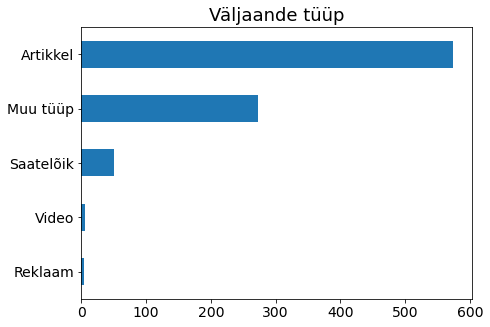

In [550]:
sagedused10 = data['Väljaande tüüp'].value_counts()
tabel10 = pd.DataFrame({'Väljaande tüüp':sagedused10.index, 'Kaebuste arv':sagedused10.values})
tabel10.to_excel("01tabelid/tabel10_Väljaande_tüüp_oigeks_tauniv.xlsx")
fig, ax = plt.subplots(figsize=(7, 5))
plt.title("Väljaande tüüp", size=18)
sagedused10.sort_values().plot(ax = ax, kind='barh', fontsize=14)
plt.ylabel("")
plt.savefig("01joonised/joonis10_Väljaande_tüüp_oigeks_tauniv.png")
plt.show()

In [537]:
del data['Väljaande tüüp1']
del data['Väljaande tüüp2']

In [538]:
Vs = list(zip(Vliik, Vn))

### Meedia liigi määramine

In [542]:
Vk = []
for v in Vs:
    if v[0] == tr and v[1]  == art:
        Vk.append(tr)
    elif v[0] == tr and v[1]  == vi:
        Vk.append(te)
    elif v[0] == tr and v[1]  == sa:
        Vk.append(te)
    elif v[0] == tr and v[1]  == re:
        Vk.append(mu)
    elif v[0] == tr and v[1]  == mu:
        Vk.append(tr)
    
    elif v[0] == te and v[1]  == art:
        Vk.append(tr)
    elif v[0] == te and v[1]  == vi:
        Vk.append(te)
    elif v[0] == te and v[1] == sa:
        Vk.append(te)
    elif v[0] == te and v[1]  == re:
        Vk.append(te)
    elif v[0] == te and v[1]  == mu:
        Vk.append(te)
    
    elif v[0] == mu and v[1] == art:
        Vk.append(tr)
    elif v[0] == mu and v[1] == vi:
        Vk.append(te)
    elif v[0] == mu and v[1] == sa:
        Vk.append(te)
    elif v[0] == mu and v[1] == re:
        Vk.append(mu)
    elif v[0] == mu and v[1] == mu:
        Vk.append(mu)
    else:
        Vk.append(mu)

In [544]:
Vk

['trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'rääkiv meedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'rääkiv meedia',
 'trükimeedia',
 'rääkiv meedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'rääkiv meedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'rääkiv meedia',
 'rääkiv meedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'trükimeedia',
 'rääkiv meedia',
 'trükimeedia',
 'rääkiv meedia',
 'trükimeedia',
 'trükimeedia',
 'trükim

In [543]:
data['Meedia liik'] = Vk

C:\Users\annel\anaconda3\envs\AL_keskkond\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


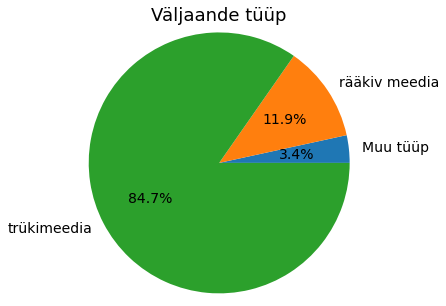

In [554]:
sagedused11 = data['Meedia liik'].value_counts()
tabel11 = pd.DataFrame({'Väljaande meedia liik':sagedused11.index, 'Kaebuste arv':sagedused11.values})
tabel11.to_excel("01tabelid/tabel11_Väljaande_meedia_liik_oigeks_tauniv.xlsx")
fig, ax = plt.subplots(figsize=(7, 5))
plt.title("Väljaande tüüp", size=18)
sagedused11.sort_values().plot(ax = ax, kind='pie', fontsize=14, autopct='%1.1f%%', radius = 1.2)
plt.ylabel("")
plt.savefig("01joonised/joonis11_Väljaande_meedia_liik_oigeks_tauniv.png")
plt.show()

In [555]:
tabel11

,Väljaande meedia liik,Kaebuste arv
0,trükimeedia,769
1,rääkiv meedia,108
2,Muu tüüp,31


In [556]:
### frequency table using crosstab()function

import pandas as pd
my_crosstab = pd.crosstab(index=data["Meedia liik"], 
                            columns=data["Väljaande liik"],
                             margins=True)   # Include row and column totals
my_crosstab

Väljaande liik,muu meedia,rääkiv meedia,trükimeedia,All
Meedia liik,,,,
Muu tüüp,27,0,4,31
rääkiv meedia,0,100,8,108
trükimeedia,0,7,762,769
All,27,107,774,908


In [557]:
trykimeedia = data[(data['Meedia liik']=='trükimeedia')]
del trykimeedia['Väljaande liik']
del trykimeedia['Väljaande tüüp']
del trykimeedia['Meedia liik']

In [558]:
trykimeedia

,#,Kaebuse kuupäev,Kaebuse aasta,Väljaanne,Kaebuse sisu,Lahendi kuupäev,Otsuse sisu,Lahendi liik,Koodeks,1.2,...,4.9,4.10,4.11,4.12,5.1,5.2,5.3,6.1,Koodeksipunkte,Väljaande nimi
0,1081,27.12.21,2021,"Pärnu Postimees 07.12.21 Käre pakane viis bussid rivist välja, autoabi osutajatel käed-jalad tööd täis","Kaebaja leiab, et artikli foto on eksitav, sest jätab mulje nagu poleks ATKO buss sõita saanud.",27.01.22,"ÕIGEKSMÕISTEV: Pärnu Postimees ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei jäta artikkel muljet, nagu oleks ATKO Bussiliinide bussidel käreda külmaga probleeme olnud. Ka pildiallkiri ütleb, et liinil nr 40 probleeme ei olnud.",õigeksmõistev,[],0,...,0,0,0,0,0,0,0,0,0,Pärnu Postimees
1,1080,08.12.21,2021,Eesti Ekspress 08.12.21 Varro Vooglaid räägib kodusõja puhkemisest,Kaebaja hinnangul jätab artikli juhtlõik temast eksitava ja pahatahtliku mulje.,27.01.22,"ÕIGEKSMÕISTEV: Ekspress ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei ole loo juhtlõik eksitav, sest artiklis ütleb Varro Vooglaid, et on valmis oma pere kaitsmiseks sundvaktsineerimise eest relva haarama. Pressinõukogu arvates on ajakirjandusel õigus pealkirjades ja juhtlõikudes artiklid värvikamalt kokku võtta, kuid seda ei tohi teha kellegi arvelt. Antud juhul ei ole juhtlõiku värve lisades kaebajat kuritarvitatud, sest Varro Vooglaid ise toob loos vaktsineerimise temaatika sisse.",õigeksmõistev,[],0,...,0,0,0,0,0,0,0,0,0,Eesti Ekspress
2,1079,08.12.21,2021,Hiiu Leht 03.12.21 Maksumaksjale läks Valge Ingli afäär maksma 51 000 eurot 03.12.21 Roostes Valge Ingel,"Kaebaja leiab, et artiklis ja juhtkirjas on tema kohta esitatud tõsist kriitikat, kuid sõna ei antud. Kaebaja hinnangul sisaldab artikkel eksitavat ja ebatäpset infot.",27.01.22,"TAUNIV: Hiiu Leht rikkus ajakirjanduseetika koodeksi punkti 5.1., mis näeb ette, et kui kellegi kohta avaldatakse tõsiseid süüdistusi, tuleks talle pakkuda kommentaari võimalust samas numbris. Pressinõukogu hinnangul süüdistatakse artiklis Inge Taltsi tuuliku naabrite hirmutamises ja eksitava info jagamises. Samuti rikkus leht ajakirjanduseetika koodeksi punkti 3.3., mis näeb ette, et ajakirjanik peab rangelt kinni informatsiooniallikale antud lubadustest ja väldib lubadusi, mida ta ei suuda täita. Pressinõukogu hinnangul ei pidanud ajakirjanik kinni Inge Taltsile antud lubadusest avaldada tema seisukoht järgmises artiklis.",tauniv,"['5.1', '3.3']",0,...,0,0,0,0,1,0,0,0,2,Hiiu Leht
3,1078,06.12.21,2021,Hiiu Leht 22.10.21 Jalutuskäik Tiit Leito elutöö varemetel,"Kaebaja ei ole rahul, et tema vastulauset ei avaldatud, kuigi artiklis esitati tema kohta süüdistusi.",27.01.22,"ÕIGEKSMÕISTEV: Hiiu Leht ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul on artikkel üldisemalt maastikukaitsealast, Saarnaki hoonete kompleksi mainitakse vaid väikeses osas loost ning seejuures ei avaldatud rentniku nime. Pressinõukogu hinnangul ei esitata kaebaja kohta tõsiseid süüdistusi ja seepärast ei olnud vajadust kaebajale sõna anda.",õigeksmõistev,[],0,...,0,0,0,0,0,0,0,0,0,Hiiu Leht
4,1077,02.12.21,2021,Õhtuleht 01.12.21,"Kaebaja leiab, et artikkel on pahatahtlik ja sisaldab valeinfot. Samuti ei ole kaebaja rahul, et teda on artiklis nimeliselt nimetatud.",27.01.2022,ÕIGEKSMÕISTEV: Õhtuleht ei rikkunud head ajakirjandustava. Pressinõukogu hinnangul kajastab artikkel kohtuotsust ja välja on jäetud eraelulised andmed.,õigeksmõistev,[],0,...,0,0,0,0,0,0,0,0,0,Õhtuleht
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1074,7,04.12.02,2002,"Estonija 11.11.02 ""Keemia ja elu""","Kaebaja väitel on artikkel täis faktivigu ning kahjustab otsitud negatiivsete järeldustega seetõttu ettevõtte mainet. Kaebaja pole rahul asjaoluga, et leht pole valefaktide vältimiseks pöördunud Nitroferdi juhtkonna poole.",27.02.03,"TAUNIV: Artiklis on rikutud mitut ajakirjanduseetika koodeksi punkti, muuhulgas on läbisegi oletused ja uudised ning lehe hinnangud ei põhine k

In [559]:
trykimeedia.shape

(769, 37)

In [560]:
trykimeedia.head()

,#,Kaebuse kuupäev,Kaebuse aasta,Väljaanne,Kaebuse sisu,Lahendi kuupäev,Otsuse sisu,Lahendi liik,Koodeks,1.2,...,4.9,4.10,4.11,4.12,5.1,5.2,5.3,6.1,Koodeksipunkte,Väljaande nimi
0,1081,27.12.21,2021,"Pärnu Postimees 07.12.21 Käre pakane viis bussid rivist välja, autoabi osutajatel käed-jalad tööd täis","Kaebaja leiab, et artikli foto on eksitav, sest jätab mulje nagu poleks ATKO buss sõita saanud.",27.01.22,"ÕIGEKSMÕISTEV: Pärnu Postimees ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei jäta artikkel muljet, nagu oleks ATKO Bussiliinide bussidel käreda külmaga probleeme olnud. Ka pildiallkiri ütleb, et liinil nr 40 probleeme ei olnud.",õigeksmõistev,[],0,...,0,0,0,0,0,0,0,0,0,Pärnu Postimees
1,1080,08.12.21,2021,Eesti Ekspress 08.12.21 Varro Vooglaid räägib kodusõja puhkemisest,Kaebaja hinnangul jätab artikli juhtlõik temast eksitava ja pahatahtliku mulje.,27.01.22,"ÕIGEKSMÕISTEV: Ekspress ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul ei ole loo juhtlõik eksitav, sest artiklis ütleb Varro Vooglaid, et on valmis oma pere kaitsmiseks sundvaktsineerimise eest relva haarama. Pressinõukogu arvates on ajakirjandusel õigus pealkirjades ja juhtlõikudes artiklid värvikamalt kokku võtta, kuid seda ei tohi teha kellegi arvelt. Antud juhul ei ole juhtlõiku värve lisades kaebajat kuritarvitatud, sest Varro Vooglaid ise toob loos vaktsineerimise temaatika sisse.",õigeksmõistev,[],0,...,0,0,0,0,0,0,0,0,0,Eesti Ekspress
2,1079,08.12.21,2021,Hiiu Leht 03.12.21 Maksumaksjale läks Valge Ingli afäär maksma 51 000 eurot 03.12.21 Roostes Valge Ingel,"Kaebaja leiab, et artiklis ja juhtkirjas on tema kohta esitatud tõsist kriitikat, kuid sõna ei antud. Kaebaja hinnangul sisaldab artikkel eksitavat ja ebatäpset infot.",27.01.22,"TAUNIV: Hiiu Leht rikkus ajakirjanduseetika koodeksi punkti 5.1., mis näeb ette, et kui kellegi kohta avaldatakse tõsiseid süüdistusi, tuleks talle pakkuda kommentaari võimalust samas numbris. Pressinõukogu hinnangul süüdistatakse artiklis Inge Taltsi tuuliku naabrite hirmutamises ja eksitava info jagamises. Samuti rikkus leht ajakirjanduseetika koodeksi punkti 3.3., mis näeb ette, et ajakirjanik peab rangelt kinni informatsiooniallikale antud lubadustest ja väldib lubadusi, mida ta ei suuda täita. Pressinõukogu hinnangul ei pidanud ajakirjanik kinni Inge Taltsile antud lubadusest avaldada tema seisukoht järgmises artiklis.",tauniv,"['5.1', '3.3']",0,...,0,0,0,0,1,0,0,0,2,Hiiu Leht
3,1078,06.12.21,2021,Hiiu Leht 22.10.21 Jalutuskäik Tiit Leito elutöö varemetel,"Kaebaja ei ole rahul, et tema vastulauset ei avaldatud, kuigi artiklis esitati tema kohta süüdistusi.",27.01.22,"ÕIGEKSMÕISTEV: Hiiu Leht ei eksinud ajakirjanduseetika koodeksi vastu. Pressinõukogu hinnangul on artikkel üldisemalt maastikukaitsealast, Saarnaki hoonete kompleksi mainitakse vaid väikeses osas loost ning seejuures ei avaldatud rentniku nime. Pressinõukogu hinnangul ei esitata kaebaja kohta tõsiseid süüdistusi ja seepärast ei olnud vajadust kaebajale sõna anda.",õigeksmõistev,[],0,...,0,0,0,0,0,0,0,0,0,Hiiu Leht
4,1077,02.12.21,2021,Õhtuleht 01.12.21,"Kaebaja leiab, et artikkel on pahatahtlik ja sisaldab valeinfot. Samuti ei ole kaebaja rahul, et teda on artiklis nimeliselt nimetatud.",27.01.2022,ÕIGEKSMÕISTEV: Õhtuleht ei rikkunud head ajakirjandustava. Pressinõukogu hinnangul kajastab artikkel kohtuotsust ja välja on jäetud eraelulised andmed.,õigeksmõistev,[],0,...,0,0,0,0,0,0,0,0,0,Õhtuleht


## 1.4.4 Trükitud meedias ilmunud artiklite kaebused, mis on saanud õigeksmõistva või tauniva otsuse pressinõukogu poolt

In [ ]:
trykimeedia.to_csv('toofailid/trykimeedia.csv',index=False)
read_file = pd.read_csv (r'toofailid/trykimeedia.csv')
read_file.to_excel (r'toofailid/trykimeedia.xlsx', index = None, header=True)

In [ ]:
taunivad_kasutatud=[]
taunivad = trykimeedia[trykimeedia['Lahendi liik']=='tauniv']
for i in koodeks_kasutatud:
    Sum = sum(taunivad[i])
    if Sum == 0:
        del taunivad[i]
    else:
        taunivad_kasutatud.append(i)

In [ ]:
list_kokku02 = []
df02 = pd.DataFrame()
for i in taunivad_kasutatud:
    Total = taunivad[i].sum()
    list_kokku02.append(Total)
df02['Koodeksipunkt'] = taunivad_kasutatud
df02['Eksimuste arv'] = list_kokku02

In [ ]:
df02.to_excel("01tabelid/tabel1_4_Eetikakoodeksi_vastu_eksimused_taunivates_otsustes.xlsx") 

In [ ]:
#Taunivates otsustes mainitud koodeksipunktid kokku
df02['Eksimuste arv'].sum()

In [ ]:
df02

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.title("Eetikakoodeksi vastu tehtud eksimused taunivates otsustes 2002-2021", size=18)
df02.plot(ax=ax, kind = 'bar', x = 'Koodeksipunkt', y = 'Eksimuste arv')
plt.savefig("01joonised/joonis1_4_Eetikakoodeksi_vastu_eksimused_taunivates_otsustes.png")
plt.show()

In [ ]:
taunivad.to_csv('toofailid/taunivad.csv',index=False)
read_file = pd.read_csv (r'toofailid/taunivad.csv')
read_file.to_excel (r'toofailid/taunivad.xlsx', index = None, header=True)